In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [67]:
data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

In [68]:
data

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
0,EXA000001,none,male,some college,standard,Section A,70,73,70
1,EXA000002,none,male,master's degree,free/reduced,Section C,55,54,52
2,EXA000003,none,male,master's degree,free/reduced,Section E,56,46,43
3,EXA000004,none,female,some college,free/reduced,Section C,35,47,41
4,EXA000005,none,female,high school,standard,Section C,87,92,81
...,...,...,...,...,...,...,...,...,...
31994,EXA031995,none,male,some high school,free/reduced,Section E,63,53,80
31995,EXA031996,none,female,high school,standard,Section B,100,80,68
31996,EXA031997,none,male,bachelor's degree,free/reduced,Section B,62,61,74
31997,EXA031998,none,male,associate's degree,standard,Section D,75,32,82


In [69]:
encoded_data = data.copy()

In [70]:
le = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['test preparation ', 'gender', 'parental level of education', 'lunch', 'Section']

# Applying LabelEncoder to each categorical column
for column in categorical_columns:
    encoded_data[column] = le.fit_transform(encoded_data[column])
for column in categorical_columns:
    test_data[column] = le.fit_transform(test_data[column])

# Display the first few rows of the encoded dataframe
print(encoded_data.head())

     Roll no  test preparation   gender  parental level of education  lunch  \
0  EXA000001                  1       1                            4      1   
1  EXA000002                  1       1                            3      0   
2  EXA000003                  1       1                            3      0   
3  EXA000004                  1       0                            4      0   
4  EXA000005                  1       0                            2      1   

   Section  practical score  viva score  exam score  
0        0               70          73          70  
1        2               55          54          52  
2        4               56          46          43  
3        2               35          47          41  
4        2               87          92          81  


In [71]:
encoded_data.drop(columns=["Roll no"],inplace=True)
test_data.drop(columns=["Roll no"],inplace=True)

In [72]:
test_data

,test preparation,gender,parental level of education,lunch,Section,practical score,viva score
0,1,1,0,1,2,74,89
1,0,1,5,1,4,66,75
2,1,1,5,1,2,52,55
3,0,1,5,1,3,69,85
4,1,0,1,1,4,46,62
...,...,...,...,...,...,...,...
95,1,1,1,1,1,82,84
96,0,1,0,0,1,70,58
97,1,1,4,1,2,76,67
98,0,1,0,1,0,62,71


In [73]:
lable = encoded_data.pop("exam score")
x_train,x_val,y_train,y_val = train_test_split(encoded_data,lable,test_size=0.2,random_state = 42)

In [74]:
x_train

,test preparation,gender,parental level of education,lunch,Section,practical score,viva score
23553,1,0,0,1,4,72,92
22030,1,0,4,0,3,76,73
265,1,1,0,1,0,37,40
22726,1,0,4,0,1,69,61
27927,1,0,3,1,2,80,66
...,...,...,...,...,...,...,...
29802,0,1,0,0,1,86,79
5390,1,0,0,0,4,64,72
860,1,1,0,1,3,61,56
15795,1,0,0,1,4,100,82


In [75]:
tree_regressor = DecisionTreeRegressor(max_depth=5)
tree_regressor.fit(x_train,y_train)
y_train_pred = tree_regressor.predict(x_train)
y_val_pred = tree_regressor.predict(x_val)

In [76]:
mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (MSE) on training data: {mse}")
mse = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error (MSE) on Validation data: {mse}")

Mean Squared Error (MSE) on training data: 224.0912181255792
Mean Squared Error (MSE) on Validation data: 221.82449336924458


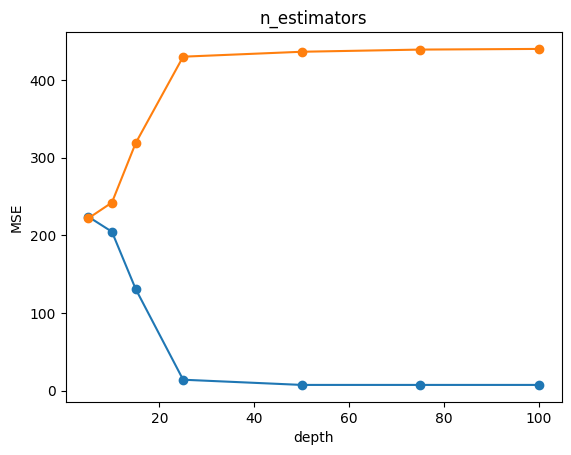

In [77]:
max_depth1 = [5,10,15,25,50,75,100]
train_result=[]
val_result=[]
for i in max_depth1:
    tree_c= DecisionTreeRegressor(max_depth = i)
    tree_c.fit(x_train,y_train)
    y_train_pred = tree_c.predict(x_train)
    train_result.append(mean_squared_error(y_train, y_train_pred))
    y_val_pred = tree_c.predict(x_val)
    val_result.append(mean_squared_error(y_val, y_val_pred))


plt.plot(max_depth1,train_result, marker='o', linestyle='-')
plt.plot(max_depth1,val_result, marker='o', linestyle='-')
plt.xlabel("depth")
plt.ylabel('MSE')
plt.title('n_estimators')
plt.show()

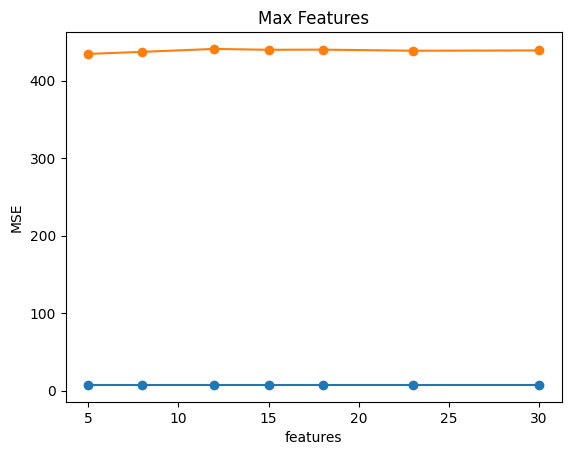

In [78]:
max_fe1 = [5,8,12,15,18,23,30]
train_result=[]
val_result=[]
for i in max_fe1:
    tree_= DecisionTreeRegressor(max_features = i)
    tree_c.fit(x_train,y_train)
    y_train_pred = tree_c.predict(x_train)
    train_result.append(mean_squared_error(y_train, y_train_pred))
    y_val_pred = tree_c.predict(x_val)
    val_result.append(mean_squared_error(y_val, y_val_pred))





plt.plot(max_fe1,train_result, marker='o', linestyle='-')
plt.plot(max_fe1,val_result, marker='o', linestyle='-')
plt.xlabel("features")
plt.ylabel('MSE')
plt.title('Max Features')
plt.show()

In [79]:
list1=[]
depth = [5,10,15,25,50,75,100]
features= [None,5,8,12,15,18,23,30]
min_samples_s = [None,1.0,2,4,8,10,12,14]
for j in depth:
    for k in features:
        for l in min_samples_s:
            tree_= DecisionTreeRegressor(max_depth = j, max_features = k, min_samples_split = l)
            tree_c.fit(x_train,y_train)
            y_train_pred = tree_c.predict(x_train)
            train_accuracy = mean_squared_error(y_train, y_train_pred)
            y_val_pred = tree_c.predict(x_val)
            val_accuracy = mean_squared_error(y_val, y_val_pred)
            list1.append((j,k,l,train_accuracy,val_accuracy))
            print(f'''For max_depth:{j},max_features:{k},min_samples_split:{l}
            train accuracy:{train_accuracy} validation accuracy:{val_accuracy}''')

For max_depth:5,max_features:None,min_samples_split:None
            train accuracy:7.524538718960377 validation accuracy:443.03044487847217
For max_depth:5,max_features:None,min_samples_split:1.0
            train accuracy:7.524538718960377 validation accuracy:438.76005425347216
For max_depth:5,max_features:None,min_samples_split:2
            train accuracy:7.524538718960377 validation accuracy:436.3654535590278
For max_depth:5,max_features:None,min_samples_split:4
            train accuracy:7.524538718960377 validation accuracy:439.5208485243056
For max_depth:5,max_features:None,min_samples_split:8
            train accuracy:7.524538718960377 validation accuracy:440.29909071180555
For max_depth:5,max_features:None,min_samples_split:10
            train accuracy:7.524538718960377 validation accuracy:438.2078971354167
For max_depth:5,max_features:None,min_samples_split:12
            train accuracy:7.524538718960377 validation accuracy:437.37550130208336
For max_depth:5,max_features:N

In [80]:
import lightgbm as lgb
lgbm = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
lgbm.fit(x_train, y_train)
y_train_pred = lgbm.predict(x_train)
mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (MSE) on training data: {mse}")
y_val_pred = lgbm.predict(x_val)
mse1 = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error (MSE) on training data: {mse1}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 169
[LightGBM] [Info] Number of data points in the train set: 25599, number of used features: 7
[LightGBM] [Info] Start training from score 69.117309
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [81]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
xgb.fit(x_train, y_train)
y_train_pred = xgb.predict(x_train)
mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (MSE) on training data: {mse}")
y_val_pred = xgb.predict(x_val)
mse1 = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error (MSE) on training data: {mse1}")

Mean Squared Error (MSE) on training data: 222.23798952856544
Mean Squared Error (MSE) on training data: 220.99855420137416


In [82]:
from catboost import CatBoostRegressor
catboost = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3, random_state=0, silent=True)
catboost.fit(x_train, y_train)
y_train_pred = catboost.predict(x_train)
mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (MSE) on training data: {mse}")
y_val_pred = catboost.predict(x_val)
mse1 = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error (MSE) on training data: {mse1}")

Mean Squared Error (MSE) on training data: 224.15456874113096
Mean Squared Error (MSE) on training data: 220.8654401992521


In [83]:
min(y_train_pred)

43.1145516240328

In [84]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300)
rf.fit(x_train,y_train)
y_train_pred = rf.predict(x_train)
mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (MSE) on training data: {mse}")
y_val_pred = rf.predict(x_val)
mse1 = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error (MSE) on training data: {mse1}")

Mean Squared Error (MSE) on training data: 37.18949009302405
Mean Squared Error (MSE) on training data: 236.86375402852443


In [96]:
list1=[]
depth1 = [5,8,10,12,16]
features= [0.01,0.1,0.5,1]
estimators = [5,25,50,75,100,150,200,250,300]
for i in estimators:
    for j in depth1:
        for k in features:
            # for l in min_samples_s:
                tree_= CatBoostRegressor(iterations=i, learning_rate=k, depth=j, random_state=0, silent=True)
                tree_.fit(x_train,y_train)
                y_train_pred = tree_.predict(x_train)
                train_accuracy = mean_squared_error(y_train, y_train_pred)
                y_val_pred = tree_.predict(x_val)
                val_accuracy = mean_squared_error(y_val, y_val_pred)
                list1.append((i,j,k,train_accuracy,val_accuracy))
                print(f'''For iterations:{i},depth:{j},learning rate:{k},
                train accuracy:{train_accuracy} validation accuracy:{val_accuracy}''')

For iterations:5,depth:5,learning rate:0.01,
                train accuracy:226.27356979987965 validation accuracy:221.15822256368483
For iterations:5,depth:5,learning rate:0.1,
                train accuracy:225.86728726405923 validation accuracy:221.0468542205591
For iterations:5,depth:5,learning rate:0.5,
                train accuracy:224.84914288929824 validation accuracy:221.28704377164667
For iterations:5,depth:5,learning rate:1,
                train accuracy:224.4846110554575 validation accuracy:221.79592411214685
For iterations:5,depth:8,learning rate:0.01,
                train accuracy:226.16977375733177 validation accuracy:221.14553332801313
For iterations:5,depth:8,learning rate:0.1,
                train accuracy:225.00320812132594 validation accuracy:220.84950308760125
For iterations:5,depth:8,learning rate:0.5,
                train accuracy:221.79997947389668 validation accuracy:220.9860566428631
For iterations:5,depth:8,learning rate:1,
                train accuracy

In [98]:
all_train_acc=[list1[i][3] for i in range(len(list1))]
all_val_acc=[list1[i][4] for i in range(len(list1))]
print(all_train_acc)
print(all_val_acc)

[226.27356979987965, 225.86728726405923, 224.84914288929824, 224.4846110554575, 226.16977375733177, 225.00320812132594, 221.79997947389668, 219.91320800801492, 225.99702413265874, 223.54650528354057, 217.5702722046823, 213.66166618276847, 225.78393874486807, 221.5493503637031, 211.4845641614582, 203.32873830812105, 225.14015135361794, 216.21824668839622, 188.99017706738763, 177.0327459953899, 226.08616600197627, 224.49292651613627, 220.93008896805995, 218.69291686037522, 225.5555669408512, 221.15810544171796, 210.45017517691335, 203.45684428662446, 224.83436633731804, 216.97968063603494, 197.9944765522435, 185.75070311675506, 223.57758580624036, 209.77504564992907, 183.13063424331023, 160.13210621713742, 220.6072655926394, 191.96221045972604, 143.22306000661837, 102.19771652435305, 225.85816317261086, 223.35785160173901, 216.52807749590292, 213.32557003170297, 224.9173972585938, 217.49603557897493, 199.82153353609368, 188.9953367329276, 223.52663252387978, 210.1203641730377, 179.301082

In [99]:
import heapq
max_5_val_acc = heapq.nsmallest(10, all_val_acc)
max_5_val_acc

[220.38100427798517,
 220.38219076005046,
 220.41036154866916,
 220.42935211237912,
 220.43823293908915,
 220.4480254972506,
 220.49015090572618,
 220.49280524651965,
 220.5375408673981,
 220.5581121595511]

In [100]:
for i in range(len(max_5_val_acc)):
    print(list1[all_val_acc.index(max_5_val_acc[i])])

(200, 10, 0.01, 217.9628462837106, 220.38100427798517)
(250, 10, 0.01, 216.36524310836765, 220.38219076005046)
(150, 10, 0.01, 219.58957829358658, 220.41036154866916)
(300, 10, 0.01, 215.00811711040436, 220.42935211237912)
(300, 8, 0.01, 220.1907676092373, 220.43823293908915)
(250, 8, 0.01, 220.98261697492052, 220.4480254972506)
(200, 8, 0.01, 221.81981013632475, 220.49015090572618)
(100, 10, 0.01, 221.36514218523564, 220.49280524651965)
(25, 8, 0.1, 221.15810544171796, 220.5375408673981)
(50, 8, 0.1, 217.49603557897493, 220.5581121595511)
